O presente estudo discorre sobre [microdados](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem) do ENEM (Exame Nacional do Ensino Médio) 2023. Não obstante, foram selecionados apenas registros referentes as provas realizadas no estado do Amapá.  
O estudo a seguir tem como objetivo demonstrar se, fatores socioeconômicos (e outros dados) possuem relação com a nota final do candidato.

In [1]:
# Data manipulation and analysis library
import pandas as pd

In [2]:
# Increase the number of displayed columns in Pandas output
pd.set_option('display.max_columns', 76)

# PREPARATION, ORGANIZATION, AND STRUCTURING OF DATA
1\. Getting to Know the Dataset  
Inicialmente, podemos verificar o conjunto de dados.

In [3]:
df = pd.read_csv('dataset_path')

df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059587847,2023,4,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600303,Macapá,16,AP,1,1,1,1,1223.0,1194.0,1203.0,1213.0,522.7,544.6,528.5,432.2,CDDABED.CEBAEEEECBBADCAEBCD..AACEDEDCBDEBEA.E,ABCDAEDAAAE.BAEBAEEADBEAAACAABABCAECDADCDAADE,EADBEEABCBBEACDACBDCA.CBACCBDBDDBDAABEDACECBA,D.DBECECDC.CACDD.DADBDCEBBEAABBDECDCDADDECADD,1,CEDAEEDEECCEBADCCCABBABCAACDDDACDBEABDCDBEABD,ABCDCBDACDAEACEECABADBEABADEBAABCDCABADCDAADE,BDBBABAAAEAAECBBEAACAAACEACBCACCCEDEDADBDBEEDD...,EBDEEBDADDABCCBCCABBADDBDDAEAEABCBEDECADCECCB,1.0,160.0,180.0,180.0,160.0,200.0,880.0,B,F,C,B,3,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,B
1,210059388096,2023,4,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600303,Macapá,16,AP,1,1,1,1,1224.0,1192.0,1202.0,1214.0,539.4,551.7,570.4,420.7,EBCCABCDCDBECBEECBABAEDAEAADECBCAEECABBDCCCBE,DCAEDEEDCBDABADEECEBACEBBDBDCDACDCDAECBDADABD,ABADACBEEEDCACBEACBBEACBACABCCBBDBBDBDDDBDDEC,CEBBDEDEEBDECDBADACABAEADBCABCECADEDBCABCEADE,1,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.0,120.0,140.0,140.0,120.0,40.0,560.0,D,E,B,D,3,B,A,B,D,A,A,B,A,B,B,A,A,A,B,A,A,D,A,B,B
2,210059982331,2023,11,F,1,3,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600600,Santana,16,AP,1,1,1,1,1223.0,1194.0,1203.0,1213.0,393.0,501.7,511.6,349.0,CBECCACDDBEBBEBCEABBBDADEBAECCDBEBDBCCBEDEBBC,ABBDCCCBCDBECBBCADEBDDECAAACBDDEDDCCEADCCAEDC,AABACCAECBBEAECBBBCAECAEACBAECDBBBDCBAEDCACBC,CAEADEADBDDCEDCBAECCDBADBBDBEBECBBDABDBDCBDBD,1,CEDAEEDEECCEBADCCCABBABCAACDDDACDBEABDCDBEABD,ABCDCBDACDAEACEECABADBEABADEBAABCDCABADCDAADE,BDBBABAAAEAAECBBEAACAAACEACBCACCCEDEDADBDBEEDD...,EBDEEBDADDABCCBCCABBADDBDDAEAEABCBEDECADCECCB,1.0,100.0,120.0,120.0,120.0,60.0,520.0,C,D,A,A,1,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
3,210058941508,2023,6,F,1,2,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600303,Macapá,16,AP,1,1,1,1,1223.0,1194.0,1203.0,1213.0,484.9,504.8,503.4,445.7,CDECBECAEEBBAAEDAECDBCBEDBAEBDEBAAEBDDCEBECDB,ABAECADECACDACBACDADDBBADACDBDACAAEDBEBCDDDDE,EDAECEAEBEBEAABABCBBACDEEBAEEDEBBEABBAEADEAEC,DDECEEBCCDBCCBABDBEDABCCDDCBEAEACDBAECBCDBEEB,1,CEDAEEDEECCEBADCCCABBABCAACDDDACDBEABDCDBEABD,ABCDCBDACDAEACEECABADBEABADEBAABCDCABADCDAADE,BDBBABAAAEAAECBBEAACAAACEACBCACCCEDEDADBDBEEDD...,EBDEEBDADDABCCBCCABBADDBDDAEAEABCBEDECADCECCB,1.0,140.0,180.0,160.0,160.0,120.0,760.0,E,B,B,B,8,A,A,B,D,A,A,B,A,B,A,B,A,A,B,A,A,C,A,A,B
4,210059589794,2023,9,M,1,3,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600600,Santana,16,AP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,5,B,D,B,C,A,A,B,A,B,A,A,A,A,B,A,A,E,A,A,B


In [4]:
df.shape

(28832, 76)

No dataset, há 28832 pessoas que participaram do ENEM 2023 do estado do Amapá. E, além disso, 76 variáveis caracterizam esses candidatos.

2\. Optimization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28832 entries, 0 to 28831
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            28832 non-null  int64  
 1   NU_ANO                  28832 non-null  int64  
 2   TP_FAIXA_ETARIA         28832 non-null  int64  
 3   TP_SEXO                 28832 non-null  object 
 4   TP_ESTADO_CIVIL         28832 non-null  int64  
 5   TP_COR_RACA             28832 non-null  int64  
 6   TP_NACIONALIDADE        28832 non-null  int64  
 7   TP_ST_CONCLUSAO         28832 non-null  int64  
 8   TP_ANO_CONCLUIU         28832 non-null  int64  
 9   TP_ESCOLA               28832 non-null  int64  
 10  TP_ENSINO               6905 non-null   float64
 11  IN_TREINEIRO            28832 non-null  int64  
 12  CO_MUNICIPIO_ESC        4354 non-null   float64
 13  NO_MUNICIPIO_ESC        4354 non-null   object 
 14  CO_UF_ESC               4354 non-null 

In [6]:
# selecting numeric columns by type
cols_float = df.select_dtypes(include='float64').columns
cols_int = df.select_dtypes(include='int64').columns

In [7]:
# applying downcast to float and int columns
df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
df[cols_int] = df[cols_int].apply(pd.to_numeric, downcast='integer')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28832 entries, 0 to 28831
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            28832 non-null  int64  
 1   NU_ANO                  28832 non-null  int16  
 2   TP_FAIXA_ETARIA         28832 non-null  int8   
 3   TP_SEXO                 28832 non-null  object 
 4   TP_ESTADO_CIVIL         28832 non-null  int8   
 5   TP_COR_RACA             28832 non-null  int8   
 6   TP_NACIONALIDADE        28832 non-null  int8   
 7   TP_ST_CONCLUSAO         28832 non-null  int8   
 8   TP_ANO_CONCLUIU         28832 non-null  int8   
 9   TP_ESCOLA               28832 non-null  int8   
 10  TP_ENSINO               6905 non-null   float32
 11  IN_TREINEIRO            28832 non-null  int8   
 12  CO_MUNICIPIO_ESC        4354 non-null   float32
 13  NO_MUNICIPIO_ESC        4354 non-null   object 
 14  CO_UF_ESC               4354 non-null 

3\. Variable treatment  
Vamos tratar inicialmente variáveis não utilizadas no estudo.

In [8]:
df_clean = df.copy().drop(columns=['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_ESC',
                                   'CO_UF_ESC', 'SG_UF_ESC', 'TP_SIT_FUNC_ESC',
                                   'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
                                   'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH',
                                   'CO_PROVA_LC', 'CO_PROVA_MT',
                                   'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
                                   'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
                                   'TX_GABARITO_CN', 'TX_GABARITO_CH',
                                   'TX_GABARITO_LC', 'TX_GABARITO_MT',
                                   'TP_STATUS_REDACAO'])

In [9]:
# Strip NU_, TP_, or TX_ prefixes from column names
df_clean.columns = df_clean.columns.str.replace(r'^(?:NO|NU|TP|TX)_', '', regex=True)

4\. ENEM Essay  
A nota de redação do ENEM deve atender alguns requisitos que trataremos aqui.  

1\) Zero scores

In [10]:
cols_comp = ['NOTA_COMP1', 'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5']

In [11]:
# 1) Select rows containing at least one zero value
zero_filter = (df_clean[cols_comp] == 0).any(axis=1)

In [12]:
zero_records = df_clean[zero_filter]

len(zero_records)

2692

In [13]:
# 2) Among these, check if the sum of the 5 columns is less than NOTA_REDACAO
component_sum = zero_records[cols_comp].sum(axis=1)

In [14]:
sum_less_filter = component_sum < zero_records['NOTA_REDACAO']

len(zero_records[sum_less_filter])

0

In [15]:
df_clean.drop(zero_records.index, inplace=True)

2\) Null values

In [16]:
df_clean.NOTA_REDACAO.isna().sum()

np.int64(9294)

In [17]:
null_filter = df_clean[cols_comp].isnull().any(axis=1)

In [18]:
null_records = df_clean[null_filter]

len(null_filter)

26140

In [19]:
component_sum = null_records[cols_comp].sum(axis=1)

In [20]:
filtro_soma_menor = component_sum < null_records['NOTA_REDACAO']

len(null_records[filtro_soma_menor])

0

In [21]:
df_clean.drop(null_records.index, inplace=True)

3\) Absent students

In [22]:
cols_pres = ['PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC', 'PRESENCA_MT']

In [23]:
filtro_elim = (df_clean[cols_pres] != 1).any(axis=1)

In [24]:
records_to_drop = df_clean[filtro_elim]

len(records_to_drop)

931

In [25]:
df_clean.drop(records_to_drop.index, inplace=True)

In [26]:
df_clean.drop(columns=cols_pres, inplace=True)

5\. Practice test-takers  
Treineiros não serão incluídos no estudo, devido ao fato de não concorrerem (no ano de 2023) a uma vaga no ensino superior.

In [27]:
df_clean.IN_TREINEIRO.value_counts()

,count
IN_TREINEIRO,
0,13715
1,2200


In [28]:
df_clean.drop(df_clean[df_clean.IN_TREINEIRO == 1].index, axis=0, inplace=True)

In [29]:
df_clean.drop(columns=['IN_TREINEIRO'], inplace=True)

In [30]:
df_clean.shape

(13715, 49)

# CORRELATION
Basicamente, mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.

Para esse estudo, nosso objetivo é verificar se há correlação entre a notas finais do candidatos e fatores socioeconômicos e dados do participante.

## Preprocessing  
1\. Dummy variable  
A variável SEXO contém os registros M (masculino) e F (feminino). Esta será convertida em dummy variable.

In [31]:
import numpy as np

In [32]:
df_corr = pd.get_dummies(df_clean, columns=['SEXO'], drop_first=True)

In [33]:
# Encode SEXO_M boolean values as 0 and 1
df_corr['SEXO_M'] = df_corr.SEXO_M.astype('int8')

2\. Ordinal encoding  
As variáveis que representam fatores socioeconômicos em sua maioria são representadas por letras, que no Dicionário de Microdados do ENEM, equivale a determinada resposta. Essas serão convertidas à escala ordinal, conveniente à análise de correlação (e regressão) no python.

In [34]:
mappings = {
    "map_A_H_nan": {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7,
                    'H': np.nan},
    "map_A_F_nan": {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': np.nan},
    "map_A_Q": {chr(ord('A') + i): i + 1 for i in range(17)},  # A=1, ..., Q=17
    "map_A_D": {'A': 1, 'B': 2, 'C': 3, 'D': 4},
    "map_A_E": {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5},
    "map_A_B": {'A': 1, 'B': 2}
    }

columns_mapping = {
    "map_A_H_nan": ['Q001', 'Q002'],
    "map_A_F_nan": ['Q003', 'Q004'],
    "map_A_Q": ['Q006'],
    "map_A_D": ['Q007'],
    "map_A_E": ['Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
                'Q016', 'Q017', 'Q019', 'Q022', 'Q024'],
    "map_A_B": ['Q018', 'Q020', 'Q021', 'Q023', 'Q025']
    }

In [35]:
# Applying the mappings
for map_name, cols in columns_mapping.items():
    for col in cols:
        df_corr[f"{col}_ord"] = df_corr[col].map(mappings[map_name]).astype('Int8')

In [36]:
# Remove obsolete mapped columns
colunas_mapeadas = [col for cols in columns_mapping.values() for col in cols]

In [37]:
df_corr.drop(columns=colunas_mapeadas, inplace=True)

3\. Final score  
Será criada uma variável para a nota final do ENEM, calculada pelas cinco provas do exame.

In [38]:
df_corr['NOTA_FINAL'] = (df_corr[['NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT']].sum(axis=1) + df_corr['NOTA_REDACAO']) / 5

In [39]:
# Replace value 1 in ESCOLA with np.nan
df_corr['ESCOLA'] = df_corr.ESCOLA.replace(1, np.nan)

In [40]:
df_corr['ESCOLA'] = df_corr['ESCOLA'].replace({2: 0,  # Public School
                                               3: 1}) # Private School

In [41]:
# Drop some uncommon and/or outdated variables
df_corr.drop(columns=['MUNICIPIO_ESC', 'MUNICIPIO_PROVA', 'NOTA_CN', 'NOTA_CH',
                      'NOTA_LC', 'NOTA_MT', 'LINGUA', 'NOTA_COMP1',
                      'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5',
                      'NOTA_REDACAO'], inplace=True)

4\. Null values  
Valores nulos são incovenientes à análise de correlação, portanto, devem ser tratados de maneira devida.

1\) Percentage of nulls

In [42]:
round(df_corr.isna().mean() * 100, 2)

,0
FAIXA_ETARIA,0.00
ESTADO_CIVIL,0.00
COR_RACA,0.00
NACIONALIDADE,0.00
ST_CONCLUSAO,0.00
ANO_CONCLUIU,0.00
ESCOLA,62.06
ENSINO,63.49
DEPENDENCIA_ADM_ESC,77.09
LOCALIZACAO_ESC,77.09


2\) Nullity Correlation Heatmap  
Mede a relação entre a ausência (nulidade) de dados nas colunas.

In [43]:
import missingno as msno

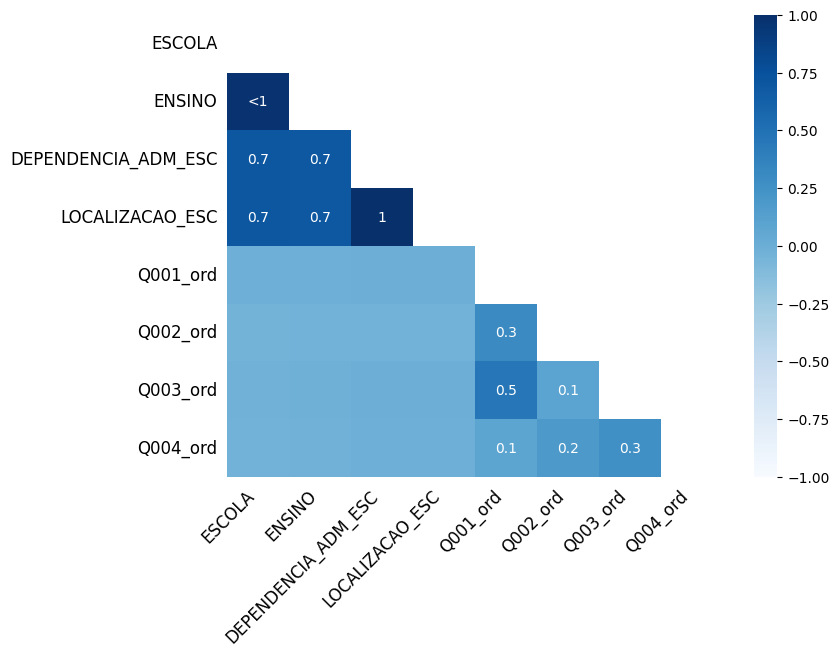

In [44]:
msno.heatmap(df_corr, cmap='Blues', figsize=(8, 6), fontsize=12);

3\) Best transformation

In [45]:
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [46]:
# 1) Dados de entrada
# Variáveis ordinais a imputar
cols_imputer = ['Q001_ord', 'Q002_ord', 'Q003_ord', 'Q004_ord']

# definição dos ranges de cada variável ordinal
ranges = {
    'Q001_ord': (1, 7),
    'Q002_ord': (1, 7),
    'Q003_ord': (1, 5),
    'Q004_ord': (1, 5)
    }

In [47]:
# 2) Criar máscara de 10% sobre valores não-nulos em cols_imputer
mask = (
    df_corr[cols_imputer]
    .notna()
    .stack()
    .sample(frac=0.1, random_state=42)
    .index
    )

In [48]:
# 3) Guardar originais e criar df mascarado
original_vals = pd.Series(
    [df_corr.at[r, c] for r, c in mask],
    index=mask
)

df_masked = df_corr.copy()

In [49]:
for r, c in mask:
    df_masked.at[r, c] = np.nan

# 4) Colunas numéricas completas para "treinar" o imputador
cols_all = df_corr.select_dtypes(include='number').columns.tolist()

In [50]:
# 5) Função auxiliar que roda o imputador e depois só sobrescreve cols_imputer
def impute_and_extract(imputer):
    # 1) ajusta e transforma todo o sub-DataFrame numérico
    full_imputed = imputer.fit_transform(df_masked[cols_all])

    # 2) pega só as ordinais e escreve de volta no df original
    df_result = df_masked.copy()
    df_result[cols_imputer] = (
        pd.DataFrame(full_imputed,
                     index=df_masked.index,
                     columns=cols_all)
          [cols_imputer]
          .round()                       # arredonda
          .astype(int)                   # converte
          .clip(
             {c: ranges[c][0] for c in cols_imputer},
             {c: ranges[c][1] for c in cols_imputer}
           )
    )
    return df_result

# 6) KNNImputer (k=3)
knn = KNNImputer(n_neighbors=3, weights='uniform')

In [51]:
df_knn = impute_and_extract(knn)

# 7) Preparar bounds para o IterativeImputer (MICE)
n_feats = len(cols_all)

In [52]:
min_vals = np.full(n_feats, -np.inf)   # inicialmente sem restrição
max_vals = np.full(n_feats,  np.inf)

In [53]:
# sobrescreve os limites reais só para os cols_imputer
for i, col in enumerate(cols_all):
    if col in ranges:
        lo, hi = ranges[col]
        min_vals[i] = lo
        max_vals[i] = hi

In [54]:
# 8) IterativeImputer com bounds
mice = IterativeImputer(
    max_iter=15,
    initial_strategy='most_frequent',
    random_state=0,
    min_value=min_vals,
    max_value=max_vals
)

In [55]:
df_mice = impute_and_extract(mice)

# 9) Extrair séries imputadas nos pontos da máscara
def get_imputed_series(df):
    return pd.Series(
        [df.at[r, c] for r, c in mask],
        index=mask
    )

knn_vals  = get_imputed_series(df_knn)

In [56]:
mice_vals = get_imputed_series(df_mice)

In [57]:
# 10) Filtrar posições plenamente válidas
valid = mask[
    original_vals.notna() &
    knn_vals.notna() &
    mice_vals.notna()
]

In [58]:
orig = original_vals.loc[valid].astype(int)
knn_ = knn_vals.loc[valid].astype(int)
mice_ = mice_vals.loc[valid].astype(int)

In [59]:
# 11) Calcular métricas comparativas
mae_knn  = mean_absolute_error(orig, knn_)
mae_mice = mean_absolute_error(orig, mice_)
acc_knn  = (orig.values == knn_.values).mean()
acc_mice = (orig.values == mice_.values).mean()
acc1_knn  = (np.abs(orig.values - knn_.values) <= 1).mean()
acc1_mice = (np.abs(orig.values - mice_.values) <= 1).mean()

In [60]:
pd.DataFrame({
    'KNN (k=3)': {
        'MAE': mae_knn,
        'Accuracy exata': acc_knn,
        '±1 Nível Acc': acc1_knn
    },
    'MICE': {
        'MAE': mae_mice,
        'Accuracy exata': acc_mice,
        '±1 Nível Acc': acc1_mice
    }
}).T

,MAE,Accuracy exata,±1 Nível Acc
KNN (k=3),0.959040,0.331316,0.775424
MICE,0.815375,0.371267,0.846651


De acordo com os resultados, o método mais vantajoso é o MICE, portanto, este será utilizado na imputação de valores nulos no dataset.

<br></br>
4\) Multiple Imputation by Chained Equations (MICE)

In [61]:
cols_all = df_corr.select_dtypes(include='number').columns.tolist()

ranges = {
    'Q001_ord': (1, 7),
    'Q002_ord': (1, 7),
    'Q003_ord': (1, 5),
    'Q004_ord': (1, 5)
    }

cols_imputer = ['Q001_ord', 'Q002_ord', 'Q003_ord', 'Q004_ord']

In [62]:
# 1) Recria o imputador (com os mesmos parâmetros já testados)
n_feats = len(cols_all)
min_vals = np.full(n_feats, -np.inf)
max_vals = np.full(n_feats,  np.inf)
for i, col in enumerate(cols_all):
    if col in ranges:
        lo, hi = ranges[col]
        min_vals[i] = lo
        max_vals[i] = hi

In [63]:
mice = IterativeImputer(
    max_iter=12,
    initial_strategy='most_frequent',
    random_state=0,
    min_value=min_vals,
    max_value=max_vals
)

# 2) Ajusta e transforma TODO o sub-DataFrame numérico do df_corr
df_imputed = df_corr.copy()

In [64]:
full_imputed = mice.fit_transform(df_imputed[cols_all])

In [65]:
# 3) Constrói um DataFrame temporário para facilitar a atribuição
df_temp = pd.DataFrame(
    full_imputed,
    index=df_imputed.index,
    columns=cols_all
)

In [66]:
# 4) Só sobrescreve as ordinais (cols_imputer), arredondando e clipando
for col in cols_imputer:
    lo, hi = ranges[col]
    df_imputed[col] = (
        df_temp[col]
          .round()               # arredonda ao inteiro mais próximo
          .astype('int8')        # converte para int
          .clip(lo, hi)          # força no intervalo válido
    )

# Verifica onde em Q001_ord há nulos, mas resolvido com a imputação
df_imputed[df_corr.Q001_ord.isna()].head()

,FAIXA_ETARIA,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,ST_CONCLUSAO,ANO_CONCLUIU,ESCOLA,ENSINO,DEPENDENCIA_ADM_ESC,LOCALIZACAO_ESC,Q005,SEXO_M,Q001_ord,Q002_ord,Q003_ord,Q004_ord,Q006_ord,Q007_ord,Q008_ord,Q009_ord,Q010_ord,Q011_ord,Q012_ord,Q013_ord,Q014_ord,Q015_ord,Q016_ord,Q017_ord,Q019_ord,Q022_ord,Q024_ord,Q018_ord,Q020_ord,Q021_ord,Q023_ord,Q025_ord,NOTA_FINAL
18,4,1,3,1,1,1,NaN,NaN,NaN,NaN,5,0,3,3,2,2,2,2,2,2,1,1,2,2,1,1,1,1,2,5,1,1,1,1,1,2,568.059998
22,3,1,3,1,2,0,0.0,1.0,NaN,NaN,5,0,5,4,4,2,2,1,2,3,1,1,2,1,2,1,1,1,2,3,1,1,1,1,1,1,488.460022
41,5,1,3,1,1,0,NaN,NaN,NaN,NaN,6,0,4,5,2,2,2,1,2,4,1,1,2,2,2,1,1,1,3,4,1,1,1,1,1,2,477.799988
45,3,1,3,1,2,0,0.0,1.0,2.0,1.0,5,0,4,6,2,4,5,1,2,4,1,1,2,1,1,1,1,1,2,5,1,1,1,1,1,2,539.440002
57,5,1,2,1,1,0,NaN,NaN,NaN,NaN,6,0,4,4,2,2,1,1,4,4,1,1,2,1,2,2,1,1,2,2,1,1,1,1,1,2,438.420013


5\) Bias visualization

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Setting a light background theme
sns.set_theme(style='whitegrid')

plt.rcParams.update({
    'text.color': 'gray',             # text color
    'axes.labelcolor': 'gray',        # axis label color
    'axes.edgecolor': 'gray',         # axis border color
    'xtick.color': 'gray',            # x-axis tick color
    'ytick.color': 'gray',            # y-axis tick color
    'axes.titlecolor': 'gray',        # axis title color
    'axes.edgecolor': 'lightgray',    # axis border color
    'axes.facecolor': 'white',        # axis background color
    'figure.facecolor': 'white',      # figure background color
    'figure.edgecolor': 'white'
    })

In [69]:
treatments = [
    (df_corr, 'Original', 'grey'),
    (df_imputed, 'MICE', None)
]

In [70]:
n_vars = len(cols_imputer)
n_treat = len(treatments)

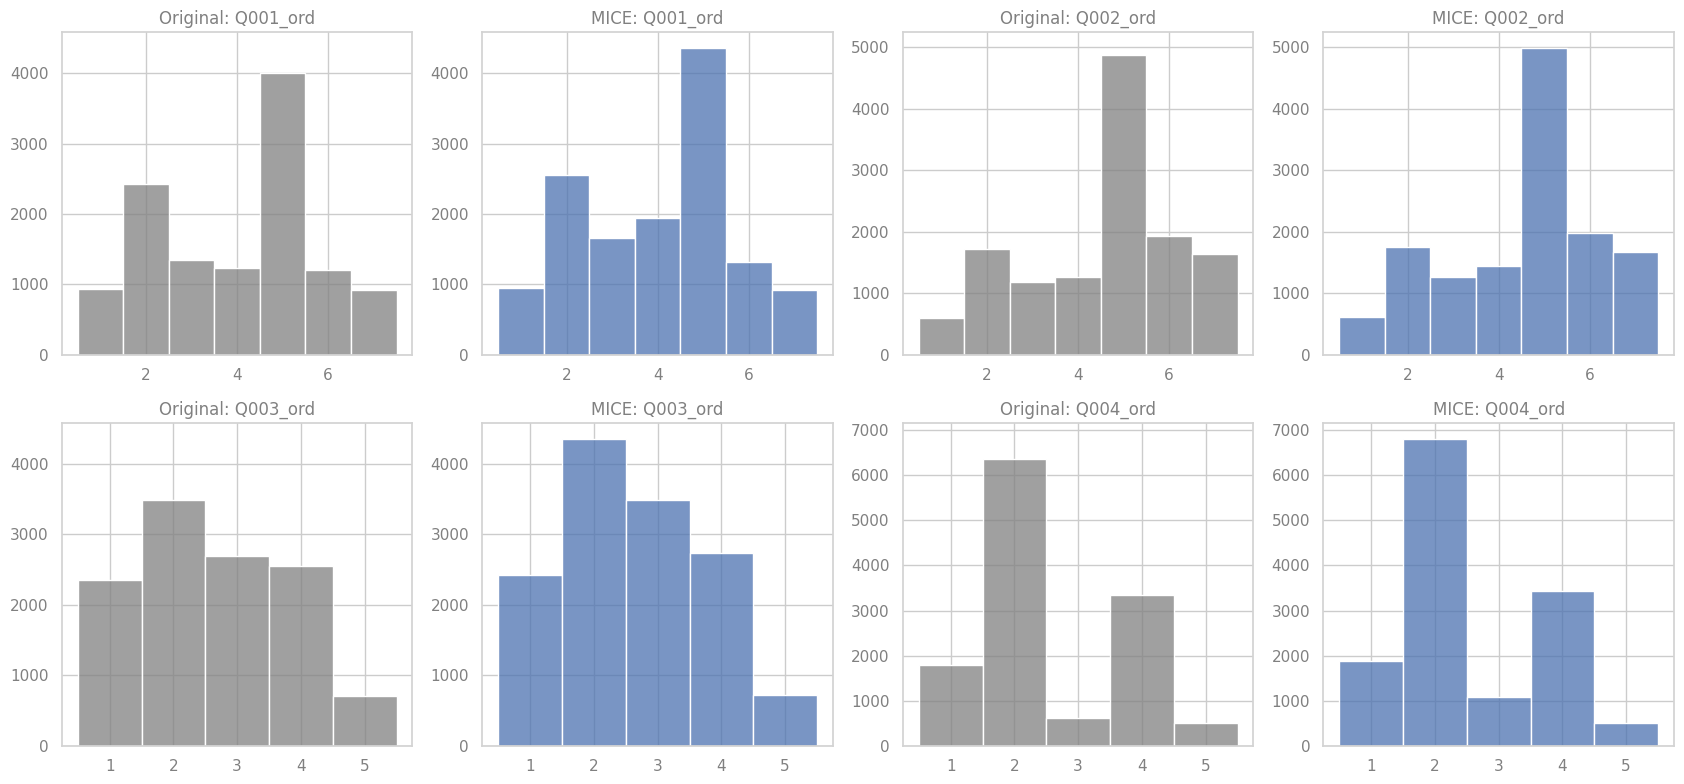

In [71]:
# 1) pré-computa o y máximo para cada variável
max_counts = {}
for var in cols_imputer:
    # pega o maior valor de frequência em cada um dos dois datasets
    cnt0 = treatments[0][0][var].value_counts().max()
    cnt1 = treatments[1][0][var].value_counts().max()
    max_counts[var] = max(cnt0, cnt1)

fig, axes = plt.subplots(2, 4, figsize=(8.5 * len(treatments), 2 * len(cols_imputer)))
axes = axes.flatten()

for i, var in enumerate(cols_imputer):
    for j, (data, label, color) in enumerate(treatments):
        k = i*2 + j           # mapeia var i e tratamento j ao subplot correto
        ax = axes[k]
        sns.histplot(data[var], discrete=True, ax=ax, color=color)

        # título e eixos
        ax.set_title(f'{label}: {var}')
        ax.set_xlabel('')
        ax.set_ylabel('')

        # força o mesmo scale de y em Original + MICE
        ax.set_ylim(0, max_counts[var] * 1.05)  # um +5% de "respiração"

plt.tight_layout();

5\) Drop inconsistent variables

In [72]:
df_imputed.drop(columns=['ESCOLA', 'ENSINO', 'DEPENDENCIA_ADM_ESC',
                       'LOCALIZACAO_ESC'], inplace=True)

## Guidelines
Alguns critérios precisam ser atendidos para utilizar Correlação Linear de Pearson. Caso os mesmos não sejam atendidos, um teste não-paramétrico deve ser utilizado.

1\) Measurement scale  
As variáveis devem ser medidas em uma escala intervalar ou de razão.

2\) Functional independence  
É necessário que determinada variável não seja calculada diretamente a partir de outra. Conhecendo a natureza dos dados, concluimos que as variáveis são independentes.

3\) Relationship between the variables  
As variáveis devem possuir relação linear.

In [73]:
import math

In [74]:
vars = [c for c in df_imputed.columns if c != 'NOTA_FINAL']

In [75]:
n = len(vars)
n_cols = 4

In [76]:
n_rows = math.ceil(n / n_cols)

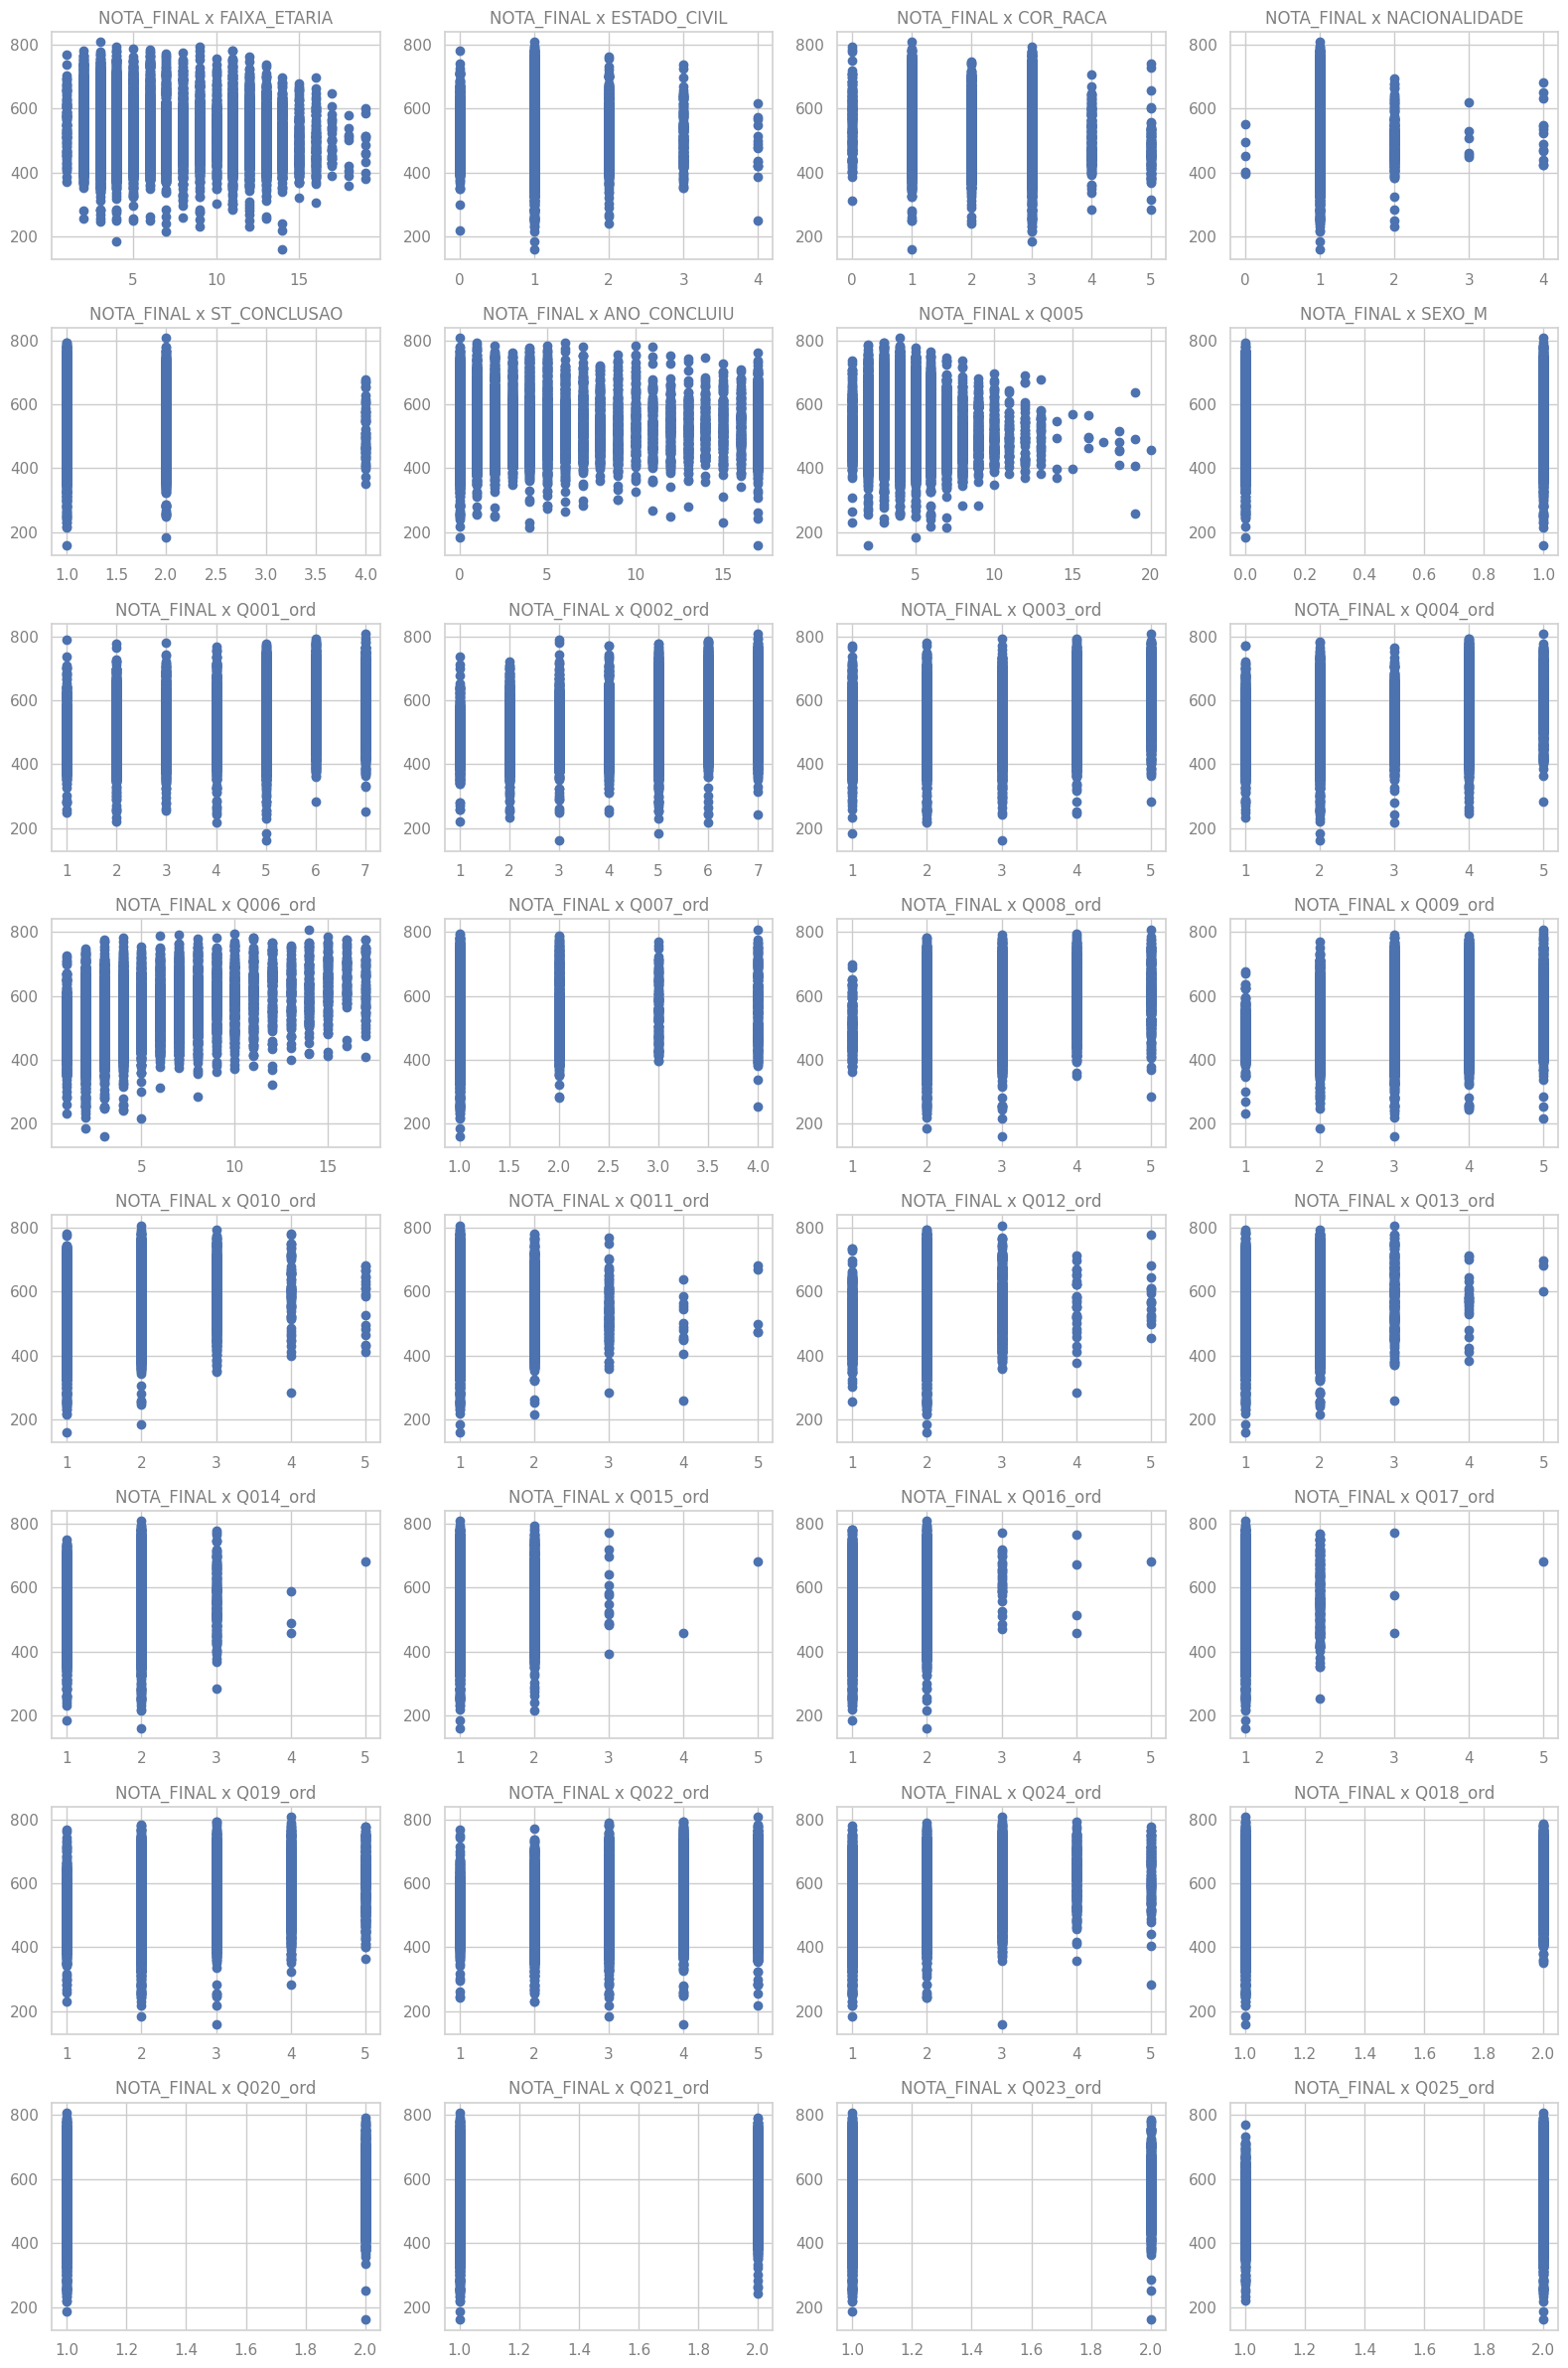

In [77]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows),
                         squeeze=False)

for idx, var in enumerate(vars):
    r = idx // n_cols
    c = idx % n_cols
    ax = axes[r][c]
    ax.scatter(df_imputed[var], df_imputed['NOTA_FINAL'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'NOTA_FINAL x {var}')

# desliga eixos que sobram
for empty_ax in axes.flatten()[n:]:
    empty_ax.axis('off')

plt.tight_layout();

Algumas correlações demonstraram ser aparentemente lineares. Dentre elas, a mais evidente foi entre NOTA_FINAL x Q006_ord.

4\) Normality  
As distribuições das variáveis devem ser normais (ou aproximadamente).

**QQ-PLOT**  
Se os pontos se alinharem aproximadamente ao longo da linha reta no gráfico, a variável pode ser considerada normalmente distribuída.

In [78]:
from scipy import stats

In [79]:
def qq_subplots(df):
    # determine the number of rows
    nrows = (len(df.columns) + 1) // 2 # round up for odd numbers

    # create the subplots
    fig, ax = plt.subplots(nrows, 2, figsize=(12, nrows * 4))

    # flatten the axes for easy iteration
    ax = ax.flatten()

    # QQ-plot graphs
    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=ax[i])
        ax[i].set_title(f"QQ-plot de {column}")

    # remove possible "empty" subplots
    for j in range(len(df.columns), len(ax)):
        fig.delaxes(ax[j])

    return plt.tight_layout()

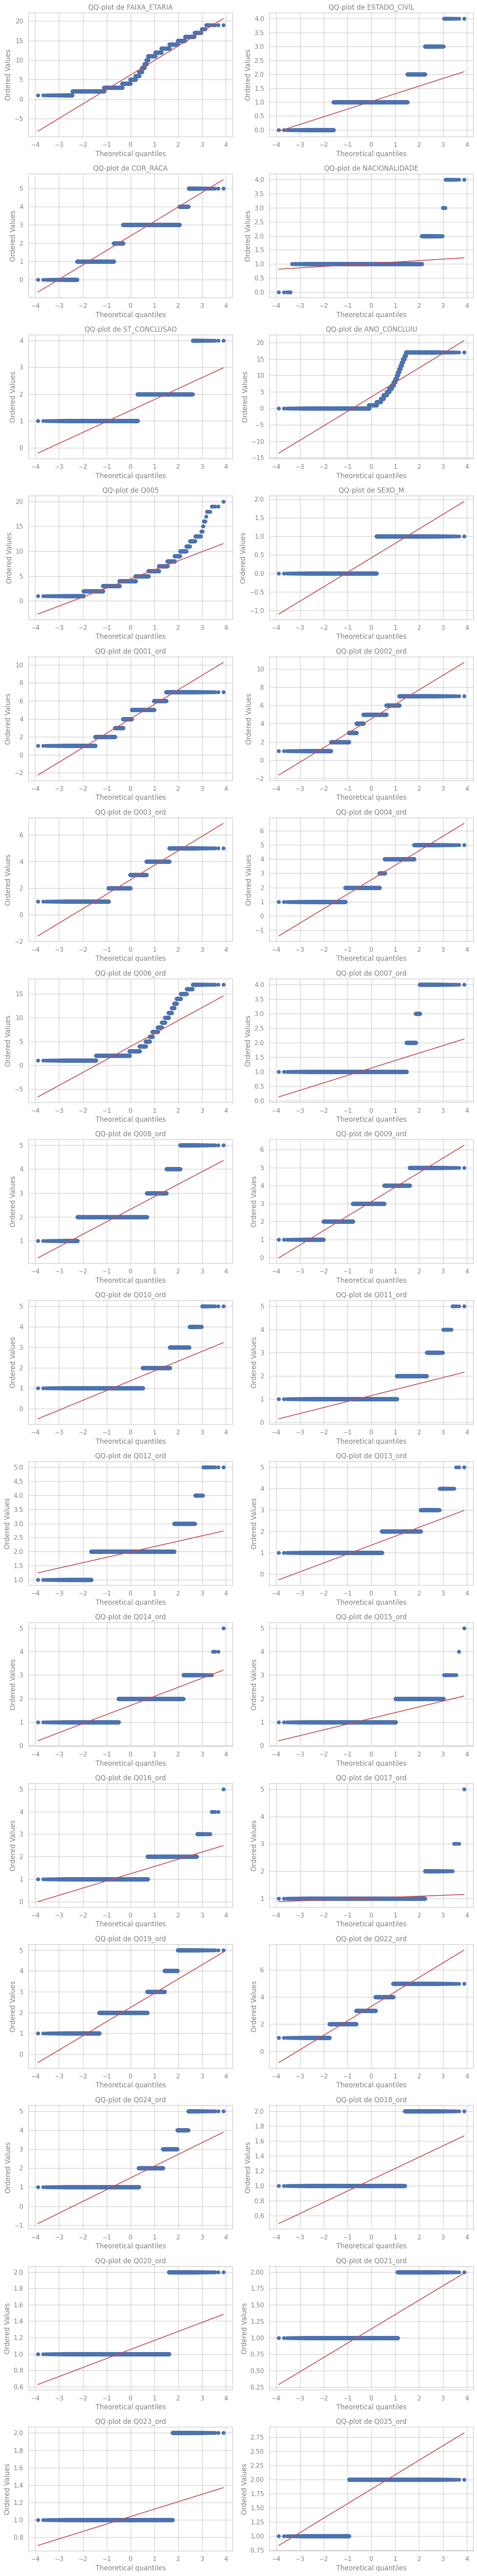

In [80]:
qq_subplots(df_imputed.drop(columns=['NOTA_FINAL']))

Os testes gráficos não aparentaram acusar normalidade.

**TESTES NUMÉRICOS**  
Critério:
- **Nível de significância (α)**: 0.05;

Hipóteses:
- **H<sub>0</sub>**: A variável segue uma distribuição normal;
- **H<sub>1</sub>**: A variável não segue uma distribuição normal.

In [81]:
from statsmodels.stats.diagnostic import lilliefors
import warnings

def normality_tests(df):
    results = []

    # Captura avisos e aplica filtros
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is .*",
            category=UserWarning,
            module='scipy.stats._axis_nan_policy'
        )

        # Executa os testes de normalidade
        for i in df.columns:
            # O aviso de Shapiro será ignorado aqui
            shapiro = stats.shapiro(df[i])[1]
            lillie = lilliefors(df[i], dist="norm")[1]
            jarque = stats.jarque_bera(df[i])[1]
            anderson = stats.anderson(df[i], dist="norm")[1][2] # alpha = 0.05

            results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                            "JARQUE": jarque, "ANDERSON": anderson})

    # Retorna o DataFrame com os resultados
    return pd.DataFrame(results, index=df.columns)

In [82]:
normality_tests(df_imputed.drop(columns=['NOTA_FINAL']))

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
FAIXA_ETARIA,1.319847e-74,0.001,0.000000e+00,0.787
ESTADO_CIVIL,9.208512e-108,0.001,0.000000e+00,0.787
COR_RACA,2.014255e-89,0.001,6.350736e-229,0.787
NACIONALIDADE,1.575690e-121,0.001,0.000000e+00,0.787
ST_CONCLUSAO,1.453160e-98,0.001,0.000000e+00,0.787
ANO_CONCLUIU,5.145996e-94,0.001,0.000000e+00,0.787
Q005,4.059539e-67,0.001,0.000000e+00,0.787
SEXO_M,1.202395e-98,0.001,0.000000e+00,0.787
Q001_ord,1.144809e-62,0.001,9.588635e-123,0.787
Q002_ord,2.696393e-66,0.001,1.737724e-155,0.787


Nenhuma distribuição acusou normalidade, exceto pelo teste de Anderson-Darling. Com isso, optamos por utilizar o teste não-paramétrico de Spearman.

## Spearman's Rho
Mede força, direção e significância do relacionamento entre duas variáveis quantitativas.

1\) Strength and direction  
A força da correlação indica quão fortemente duas variáveis estão relacionadas, já a direção, se a relação entre as mesmas é ascendente ou descendente.

| COEFICIENTE | GRAU |
- | - |
| r = ±1 | Perfeita |
| ±0,8 ≤ r < ±1 | Muito forte |
| ±0,6 ≤ r <± 0,8 | Forte |
| ±0,4 ≤ r < ±0,6 | Moderada |
| ±0,2 ≤ r < ±0,4 | Fraca |
| 0 < r < ±0,2 | Muito fraca |
| r = 0 | Inexistente |

In [83]:
# 1) Calcular correlação Spearman de NOTA_FINAL com todas as colunas
corr_spearman = df_imputed.corr(method='spearman')['NOTA_FINAL']

In [84]:
# 2) Remover a correlação de NOTA_FINAL consigo mesma (que sempre será 1.0)
corr_spearman.drop('NOTA_FINAL', inplace=True)

In [85]:
# 3) Ordenar pela força da correlação (opcional: decrescente ou crescente)
corr_spearman.sort_values(ascending=False, inplace=True)

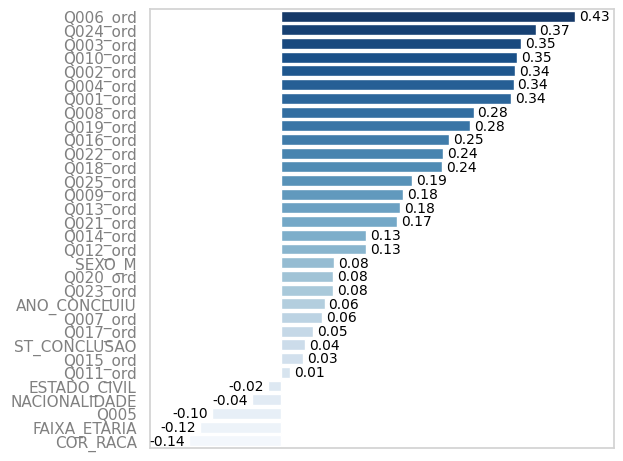

In [86]:
# 4) Desenha o barplot horizontal e captura o Axes
ax = sns.barplot(
    x=corr_spearman.values,
    y=corr_spearman.index,
    palette='Blues_r',
    hue=corr_spearman.index,
    legend=False
)

# 5) Remove completamente o eixo x (ticks, labels e spines)
ax.xaxis.set_visible(False)

# 6) Calcula mínimo e máximo para determinar margens
valores = corr_spearman.values
xmin, xmax = valores.min(), valores.max()
# Vamos adicionar uma margem de 10% do intervalo total para cada lado:
margem = (xmax - xmin) * 0.10
ax.set_xlim(xmin - margem, xmax + margem)

# 7) Adiciona os rótulos de texto em cada barra
for patch in ax.patches:
    valor = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2.0

    # Ajuste do deslocamento horizontal
    if valor >= 0:
        dx = (xmax - xmin) * 0.01   # 1% do intervalo total, apenas para destacar
        ha = 'left'
    else:
        dx = - (xmax - xmin) * 0.01
        ha = 'right'

    ax.text(
        valor + dx,
        y,
        f'{valor:.2f}',
        va='center',
        ha=ha,
        fontsize=10,
        color='black'
    )

ax.set_ylabel('')
plt.tight_layout();

Principais Insights:
1. **Renda familiar (Q006_ord):** fator de maior correlação positiva com a nota final. Isso indica que, em média, quanto maior a renda da família, maior tende a ser o desempenho no exame.
2. **Bens de capital e acesso à tecnologia:**
  * Computador em casa (Q024_ord ≈ 0,37);
  * Internet em casa (Q025_ord ≈ 0,19);
  * Carro (Q010_ord ≈ 0,35); televisão em cores (Q019_ord ≈ 0,28); micro-ondas (Q016_ord ≈ 0,25); DVD (Q020_ord ≈ 0,28).  
Esses itens podem refletir não só poder de consumo, mas também maior acesso a recursos de aprendizagem e informação.
3. **Nível de escolaridade do pais (Q001_ord e Q002_ord ≈ 0,34):** pais com mais anos de estudo podem prover ambientes mais estimulantes, apoio acadêmico e maior valorização da educação.
4. **Ocupação dos pais:**
  * Grupo ocupacional do pai (Q003_ord ≈ 0,35) e da mãe (Q004_ord ≈ 0,34): Cargos de maior responsabilidade/qualificação associam-se a melhor desempenho dos filhos.
5. **Variáveis demográficas:**
  * Raça/cor (COR_RACA ≈ -0,14) e faixa etária (≈ -0,12) têm correlações baixas (próximas de zero). Esses resultados sugerem que, isoladamente, demografia tem menor poder preditivo que fatores socioeconômicos propriamente ditos.

Com isso, o desempenho no ENEM demonstra estar mais associado a indicadores de poder aquisitivo, nível educacional e ocupacional dos pais e acesso a bens e tecnologia do que a características demográficas básicas. Isso corrobora à importância de políticas que reduzam desigualdades socioeconômicas e ampliem o acesso a recursos educacionais para elevar a equidade no resultado do exame.
<br></br>
2\) Statistical significance  
Descreve se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub>:** Não há correlação significativa entre as variáveis;
- **H<sub>1</sub>:** Há correlação significativa entre as variáveis.

In [87]:
from scipy import stats

In [88]:
p_values = []

for i in df_imputed.columns[:-1]:
    estat, p_value = stats.spearmanr(df_imputed['NOTA_FINAL'], df_imputed[i])
    p_values.append(p_value)

pd.DataFrame({'p-value': p_values}, index=df_imputed.columns[:-1])

,p-value
FAIXA_ETARIA,1.248997e-44
ESTADO_CIVIL,2.822525e-02
COR_RACA,3.311465e-57
NACIONALIDADE,8.842558e-07
ST_CONCLUSAO,2.343579e-05
ANO_CONCLUIU,5.027991e-14
Q005,2.779231e-32
SEXO_M,7.090295e-20
Q001_ord,0.000000e+00
Q002_ord,0.000000e+00


Apenas a correlação entre *NOTA_FINAL* e *Q011_ord* (presença de motocicleta em casa), cujo p-valor foi de ≈ 0,10 não se mostrou significativa.


# RANDOM FOREST REGRESSOR

## Hyperparameter tuning
1\) Learning Curve

In [89]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor

In [90]:
X = df_imputed.copy().drop(columns=['NOTA_FINAL'])

y = df_imputed.copy().NOTA_FINAL

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [92]:
base_params = {
    'n_estimators': 200,      # número de árvores (aumentar para mais estabilidade)
    'max_depth': 10,          # profundidade máxima de cada árvore
    'min_samples_leaf': 3,    # restrição para folhas (regularização)
    'min_samples_split': 4,   # restrição para nós internos
    'max_features': 'sqrt',   # cada divisão olha sqrt(n_features) atributos
}

In [93]:
rf = RandomForestRegressor(
    **base_params,
    n_jobs=-1,
    random_state=42
    )

In [94]:
# Porcentagens do tamanho do dataset que queremos usar para treino
train_sizes = np.linspace(0.1, 1.0, 10)  # 10%, 20%, ..., 100% do conjunto de dados

In [95]:
# Retorna arrays: train_sizes_abs, scores_de_treino, scores_de_cv
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="r2",
    shuffle=True,       # embaralhar antes de dividir (recomendado)
    random_state=42,
    n_jobs=-1
)

In [96]:
# Para cada tamanho de treino, temos 5 scores (por causa do cv=5)
# Vamos tirar média e desvio.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

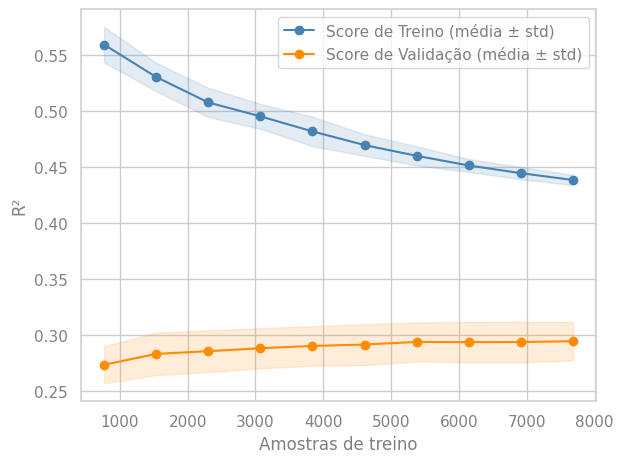

In [97]:
# Curva de treino
plt.fill_between(
    train_sizes_abs,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.15,
    color="steelblue"
)
plt.plot(
    train_sizes_abs,
    train_scores_mean,
    'o-',
    color="steelblue",
    label="Score de Treino (média ± std)"
)

# Curva de validação
plt.fill_between(
    train_sizes_abs,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.15,
    color="darkorange"
)

plt.plot(
    train_sizes_abs,
    test_scores_mean,
    'o-',
    color="darkorange",
    label="Score de Validação (média ± std)"
)

plt.xlabel("Amostras de treino")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout();

Observando a learning-curve, temos que:
- **R<sup>2</sup> de treino:** desacelera em torno de 0.44-0.45 quando você usa todo o conjunto de treino;
- **R<sup>2</sup> de validação:** estaciona em torno de 0.29-0.30;
- **Gap:** distância entre treino e validação de ~0.15, mas ambos os scores são relativamente baixos.

Esses resultados indicam um sinal de alto viés (underfitting): o modelo é simples demais para capturar as relações dos dados.  
Isso se traduz nos hiperparâmetros da árvore da seguinte forma:

| Hiperparâmetro | Efeito de aumentar | Efeito de diminuir |
| - | - | - |
| **max\_depth** | aumenta complexidade (mais níveis) | reduz complexidade (árvore rasa) |
| **min\_samples\_split** | menos splits (mais viés) | mais splits (menos viés) |
| **min\_samples\_leaf**  | folhas maiores (mais viés) | folhas menores (menos viés) |

<br></br>
2\) Validation Curve

In [98]:
from sklearn.model_selection import validation_curve

In [99]:
# Os três hiperparâmetros e seus ranges
hyperparams = [
    ('max_depth', np.arange(8, 30, 2)),
    ('min_samples_leaf', np.arange(2, 12, 2)),
    ('min_samples_split', np.arange(2, 14, 2)),
]

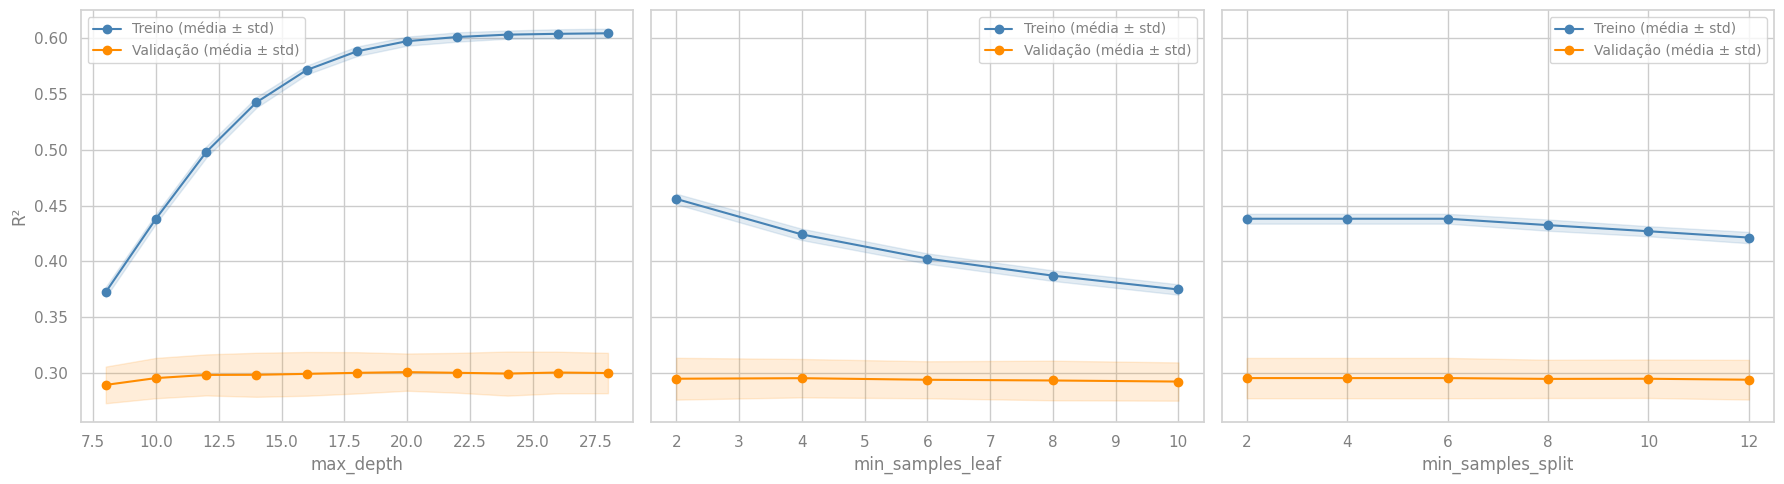

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for ax, (param_name, param_range) in zip(axes, hyperparams):
    value = base_params[param_name]
    del base_params[param_name]

    # Instancia o RandomForest sem o hiperparâmetro em questão
    rf = RandomForestRegressor(
        **base_params,
        random_state=42,
        n_jobs=-1
    )

    base_params[param_name] = value

    # Calcula a validation curve para o hiperparâmetro atual
    train_scores, val_scores = validation_curve(
        estimator=rf,
        X=X_train,
        y=y_train,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring="r2",
        n_jobs=-1,
        verbose=0
    )

    # Calcula média e desvio-padrão
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    val_mean   = np.mean(val_scores, axis=1)
    val_std    = np.std(val_scores, axis=1)

    # Plot no eixo correspondente
    ax.fill_between(
        param_range,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.15,
        color="steelblue"
    )
    ax.plot(
        param_range,
        train_mean,
        'o-',
        color="steelblue",
        label="Treino (média ± std)"
    )

    ax.fill_between(
        param_range,
        val_mean - val_std,
        val_mean + val_std,
        alpha=0.15,
        color="darkorange"
    )
    ax.plot(
        param_range,
        val_mean,
        'o-',
        color="darkorange",
        label="Validação (média ± std)"
    )

    #ax.set_title(f"{param_name}")
    ax.set_xlabel(param_name)
    ax.grid(True)
    ax.legend(loc="best", fontsize='small')

# Apenas o primeiro gráfico recebe o ylabel para não ficar repetitivo
axes[0].set_ylabel("R²")

plt.tight_layout();

3\) Ajuste

In [101]:
# No Colab, utilize o comando Ctrl + A para marcar tudo e Ctrl + ? para "descomentar"
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# rf = RandomForestRegressor(random_state=42, n_jobs=-1)
# param_dist = {
#     'n_estimators': randint(100, 400),
#     'max_depth': np.arange(8, 18, 2),
#     'min_samples_split': np.arange(2, 10, 2),
#     'min_samples_leaf': np.arange(2, 8, 2),
#     'max_features': ['sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     scoring='r2',
#     n_iter=50,
#     cv=5,
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
#     )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_

# best_params

In [102]:
best_params = {
    'max_depth': 14,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 6,
    'n_estimators': 297
    }

## Model

In [103]:
rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=297, n_jobs=-1,
                      random_state=42)

## Evaluation

### Interpretação  
Relacionamento das variáveis X em relação a y.

1\) Feature importance  
Indica quanto cada variável contribuiu, em média, para melhorar as divisões das árvores.

In [104]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

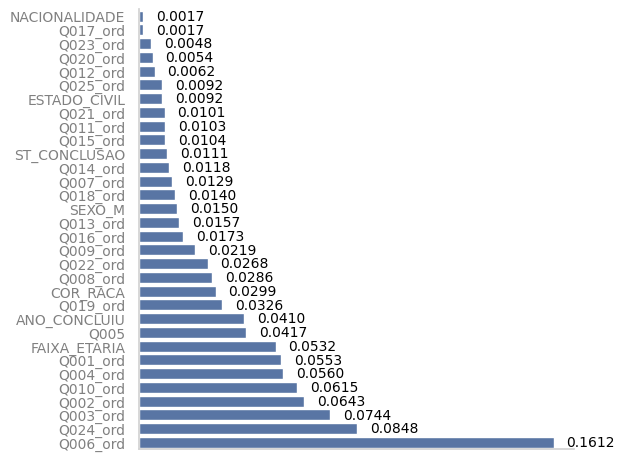

In [105]:
ax = sns.barplot(x=importances.values, y=importances.index)
plt.grid(False)
ax.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('')
plt.yticks(fontsize=10)

# Valor nas barras
for i, v in enumerate(importances.values):
    plt.text(v + 0.005, i, f'{v:.4f}', ha='left', va='center', fontsize=10,
             color='black')

plt.tight_layout();

Principais insights:
1. Renda familiar (Q006_ord) aparece como principal preditora, com ≈16% da "capacidade explicativa" do modelo;
2. Bens de tecnologia (computador em casa, Q024) e nível ocupacional/educacional dos pais (Q003, Q002, Q001, Q004) são os próximos mais relevantes, cada um entre ≈5-8%;
3. Itinerários de vida (faixa etária, ano de conclusão) e condições domiciliares (número de moradores, posse de carro) também entram no Top 10;
4. Variáveis demográficas como raça (COR_RACA, ≈3%) e sexo (SEXO_M, ≈1.5%) têm importância moderada, enquanto "estado civil" e "motocicleta em casa" praticamente não ajudam o modelo.  

<br></br>
2\) Permutational Feature Importance  
Calcula redução média no score (ex.: no R²) ao permutar cada variável.

In [106]:
from sklearn.inspection import permutation_importance

In [107]:
perm_imp = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                  random_state=42)

In [108]:
perm_series = pd.Series(perm_imp.importances_mean, index=X_test.columns)

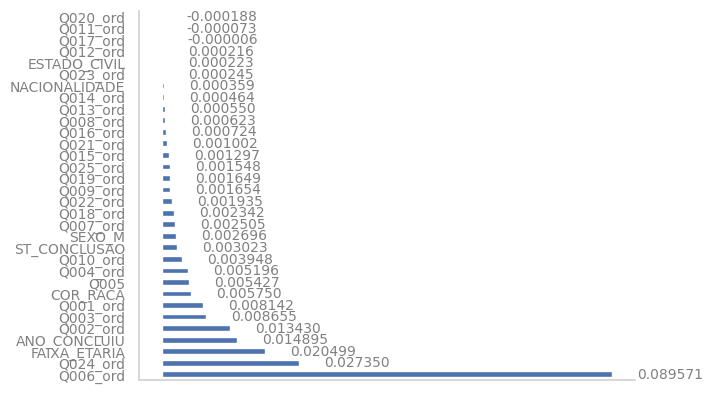

In [109]:
bars = perm_series.sort_values(ascending=False).plot.barh()

# Adicionar o valor ao lado de cada barra
for bar in bars.patches:
    bars.text(bar.get_width() + 0.005,  # Posição x do texto (um pouco à direita da barra)
              bar.get_y() + bar.get_height() / 2,  # Posição y do texto (centro vertical da barra)
              f'{bar.get_width():.6f}',  # Texto a ser exibido (formata para 4 casas decimais)
              va='center', # Alinhamento vertical
              fontsize=10)

plt.grid(False)
bars.spines['right'].set_visible(False)
bars.spines['top'].set_visible(False)
plt.yticks(fontsize=10)
# Desativar o eixo x
plt.gca().axes.get_xaxis().set_visible(False);

Principais Insights:
1. **Renda familiar (Q006_ord):** embaralhar essa variável faz a métrica piorar em ~9% (muito acima de qualquer outra);
2. **Computador em casa (Q024_ord) e idade (FAIXA_ETARIA):** aparecem em segundo e terceiro lugares, com quedas de ~2-3%.
3. **Ano de conclusão (ANO_CONCLUIU) e escolaridade da mãe (Q002_ord)**: também se mantêm no Top 5, com ~1,5% de impacto.

A partir do 6.º lugar (Q003_ord, Q001_ord, Q004_ord etc.), a contribuição individual de cada atributo torna-se relativamente modesta (< 1 %).  
Variáveis com importância “negativa” ou quase zero (p. ex. Q011_ord, Q023_ord, Q020_ord…) são candidatas a exclusão em modelos mais enxutos, pois seu efeito é irrelevante (ou até levemente prejudicial).

<br></br>
3\) SHAP (SHapley Additive exPlanations)  
Permite uma interpretação mais "justa" da contribuição de cada variável em cada previsão individual.

In [110]:
import shap

In [111]:
explainer = shap.TreeExplainer(rf)

In [112]:
shap_values = explainer.shap_values(X_test)

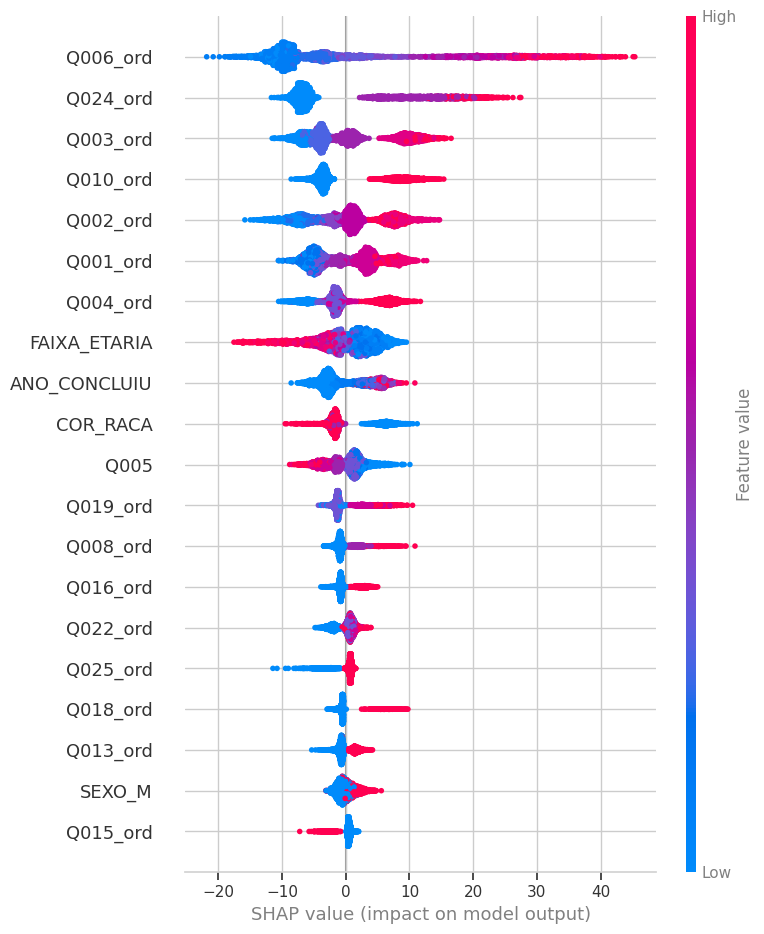

In [113]:
shap.summary_plot(shap_values, X_test)

Principais variáveis (Top Impacto SHAP):

| Variável | Interpretação do impacto SHAP |
| - | - |
| **Q006\_ord** | Renda familiar: quanto maior, maior o SHAP → aumenta a previsão da nota. Baixa renda puxa o SHAP para baixo (azul à esquerda). |
| **Q024\_ord** | Computador em casa: valor alto (tem PC) → impacto positivo na nota. |
| **Q003\_ord** | Ocupação do pai: mais qualificada → maior SHAP. |
| **Q010\_ord** | Automóvel na residência: carro (s) na residência tende (m) a puxar a nota para cima. |
| **Q002\_ord** | Escolaridade da mãe: mais escolaridade → impacto positivo. |
| **Q001\_ord** | Escolaridade do pai: padrão similar ao da mãe, mas um pouco menos impactante. |
| **Q004\_ord** | Número de pessoas morando com o candidato: relação não linear, impacto moderado. |
| **FAIXA\_ETARIA** | Alunos mais novos (em azul) têm SHAP positivo, ou seja, tendem a ter notas mais altas. |
| **ANO\_CONCLUIU** | Concluir o ensino médio recentemente tende a ter impacto positivo. |
| **COR\_RACA** | Há diferenças, mas o impacto direto no modelo é menor comparado às anteriores. |

<br></br>
Ranking entre as métricas:

| Medida | Top 1 | Top 2 | Top 3 |
| - | - | - | - |
| **Correlação (Spearman)** | Q006_ord (r<sub>s</sub>≈0,43) | Q024_ord (≈0,37) | Q003_ord (≈0,35) |
| **Impurity-Based (RF)** | Q006_ord (16,1%) | Q024_ord (8,4%) | Q003_ord (7,6%)
| **Permutation Importance** | Q006_ord (9,0%) | Q024_ord (2,9%) | FAIXA_ETARIA (2,2 %)
| **SHAP** | Q006_ord | Q024_ord | Q003_ord |

A partir disso, sabemos que Q006_ord (renda) é consistentemente a variável com maior influência na nota final do candidato, em qualquer que seja a métrica. O SHAP apenas reforça isso ao mostrar como e quanto essa variável impacta cada predição individualmente.
<br></br>
Principais divergências:  
- **3º lugar na Permutation:** substitui *Q003_ord* por *FAIXA_ETARIA*, mostrando que idade traz maior queda na performance do modelo quando permutada, mesmo tendo correlação menor;
- **Magnitude do gap:** Em RF e Permutation vemos porcentagens explícitas ("distância" entre 1º e 2º), ao passo que Spearman e SHAP expressam apenas ranking/dispersão;
- **Interpretação de FAIXA_ETARIA:**
  - Destaque na Permutation (3º), sinaliza que, apesar de correlação moderada, embaralhar a "idade" prejudica o modelo de forma mais sensível que permutar Q003_ord;
  - Fica fora do Top 3 em Spearman e SHAP, pois seu efeito monotônico e individual nos exemplos é menos óbvio.

<br></br>
4\) Partial Dependence Plot (PDP)  
Mostra o efeito médio de uma feature sobre a predição do modelo, mantendo as outras features "fixas".

In [114]:
from sklearn.inspection import PartialDependenceDisplay

In [115]:
cols_pdp = ['Q006_ord', 'Q024_ord', 'Q003_ord', 'FAIXA_ETARIA']

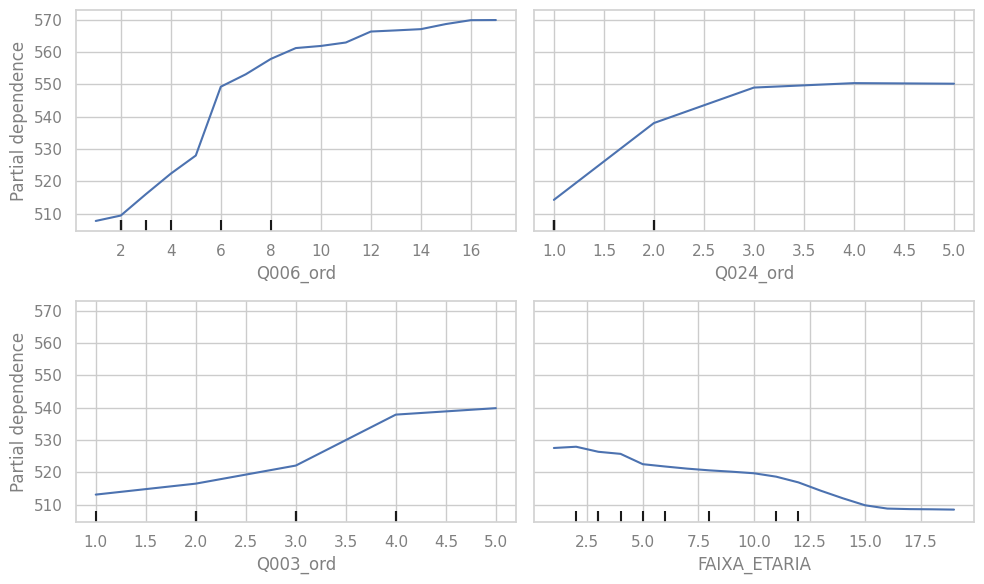

In [116]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# desenha os 4 PDPs no mesmo figure, usando a grade 2×2
PartialDependenceDisplay.from_estimator(
    rf,
    X_test,
    features=cols_pdp,
    ax=axs,               # recebe matriz 2×2 de axes
    #grid_resolution=100,  # opcional: define quantização do eixo x
)

plt.tight_layout()

Principais insights:
1. **Q006_ord (Renda familiar):**
  - **Convergência gradual (8-17):** após a categoria 6, o incremento desacelera, passando de ~560 (categoria 8) até ~570 pontos nas categorias 16-17;
  - **Insight:** as maiores alavancas estão em mover famílias da renda muito baixa para a média (6 - De R\$3.300,01 até R$3.960,00.). A parcela de subida acima de rendas já elevadas é bem menor.
2. **Q024_ord (Número de computadores na casa):**
  - **Convergência:** os dados convergem a partir da marca de 2 (3 no gráfico) ou mais computadores em casa;
  - **Insight:** o primeiro computador entrega quase 5x mais ganho de nota que um segundo, e computadores adicionais têm benefício marginal.
3. **Q003_ord (Ocupação do pai):**
  - **Níveis 1-3:** quase nenhum efeito — as previsões ficam em torno de 513-516 pontos;
  - **Insight:** só ocupações de nível mais alto (4 e 5) apresentam impacto relevante; nos patamares inferiores, não há diferença.
4. **FAIXA_ETARIA (Idade ao fazer o ENEM):**
  - **Convergência**: A partir da faixa-etária 15 (Entre 46 e 50 anos), os resultados parecem convergir;
  - **Insight:** cada ano extra de "atraso escolar" decresce suavemente a nota prevista em 2-3 pontos, acumulando perdas maiores em faixas muito atrasadas.

Resumo dos efeitos em "pontos de nota":

| Variável | Ganho máximo por "salto-chave" |
| - | - |
| **Q006\_ord** | +29 pontos (categoria 4→6) |
| **Q024\_ord** | +24 pontos (0→1 computador) |
| **Q003\_ord** | +22 pontos (nível 3→4 de ocupação do pai) |
| **Faixa Etária** | -18 pontos (idade mínima → máxima faixa) |

<br></br>
### Performance Metrics
Demonstram o desempenho do modelo.

1\) Coefficient of Determination (R<sup>2</sup>)

In [117]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [118]:
y_pred = rf.predict(X_test)

In [119]:
r2_score(y_test, y_pred)

0.3101076113432045

O modelo explica ~31,1% da variabilidade nas notas finais do ENEM. O valor moderado indica que há espaço para capturar fatores adicionais ou tratar não-linearidades e interações com mais refinamento.

<br></br>
2\) Root Mean Squared Error (RMSE)

In [120]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

66.63949036837201


Em média, a raiz do erro quadrático médio entre a nota prevista e a real é ~66,6 pontos. Considerando que a nota do ENEM vai de 0 a 1000, trata-se de um erro relativamente elevado para usos individuais, mas pode ser aceitável para estimativas populacionais.

<br></br>
3\) Mean Absolute Error (MAE)

In [121]:
mean_absolute_error(y_test, y_pred)

52.28979758453934

Em termos absolutos, o erro médio é de ~52 pontos. Isso dá uma ideia direta de "distância média" das previsões.
<br></br>
4\) Baseline Model: Dummy Regressor (Mean Strategy)

In [122]:
from sklearn.dummy import DummyRegressor

In [123]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train, y_train)

DummyRegressor()

In [124]:
dummy.score(X_test, y_test)  # R² do dummy

-1.1444091796875e-05

Um modelo que chuta a média de todas as notas não consegue explicar nada (R² ≈0). O RF supera com certa margem esse baseline obtido, validando que as features têm poder preditivo real.

### Residuals

1\) Residuals vs Predicted Values

In [125]:
y_pred_series = pd.Series(data=y_pred, index=y_test.index)

In [126]:
residuals = y_test - y_pred_series

In [127]:
df_residuals = pd.DataFrame({
    'nota_real': y_test,
    'nota_pred': y_pred_series,
    'residual': residuals
    })

In [128]:
preditos = df_residuals.nota_pred
resid = df_residuals['residual']

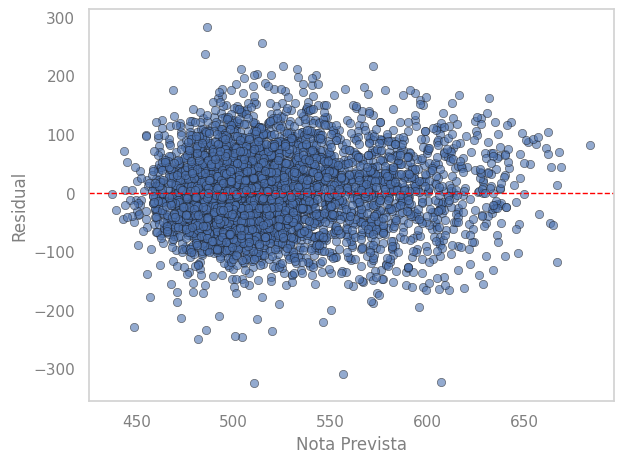

In [129]:
plt.scatter(preditos, resid, alpha=0.6, edgecolors='k', linewidths=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Nota Prevista')
plt.ylabel('Residual')
plt.grid(False)
plt.tight_layout();

O modelo está bem calibrado no centro da distribuição, mas perde precisão nos extremos (e em alguns poucos casos atípicos).
<br></br>
2\) Absolute errors

In [130]:
df_residuals['abs_residual'] = df_residuals['residual'].abs()

In [131]:
# Top 5 maiores resíduos
df_residuals.sort_values(by='abs_residual', ascending=False).head()

,nota_real,nota_pred,residual,abs_residual
13270,184.619995,510.475169,-325.855174,325.855174
15200,284.000000,606.983236,-322.983236,322.983236
14002,245.960007,556.250293,-310.290287,310.290287
2278,769.239990,486.335366,282.904624,282.904624
2540,770.479980,514.393177,256.086804,256.086804


3\) Residuals Distribution

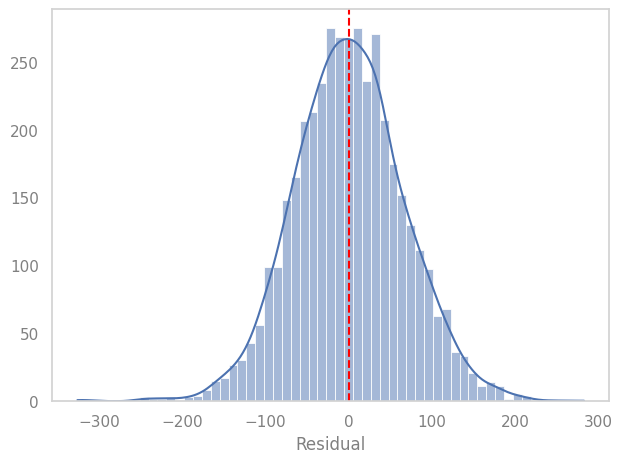

In [132]:
sns.histplot(resid, kde=True)
plt.xlabel('Residual')
plt.ylabel('')
plt.grid(False)
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout();

Principais insights:  
- **Centro aproximado em zero (linha vermelha):** confirma que o modelo, em média, não tem viés sistemático de super- ou subestimação;
- **Formato levemente leptocúrtico:** embora a forma geral seja próxima à Normal (sino), nota-se uma "cintura" um pouco mais estreita e "caudas" ligeiramente mais longas. Isso sugere mais outliers (resíduos muito grandes) do que um Gaussiano puro;
- **Simetria razoável:** não há grande assimetria à direita ou à esquerda, o que é bom para muitas técnicas que assumem erros centrais simétricos.

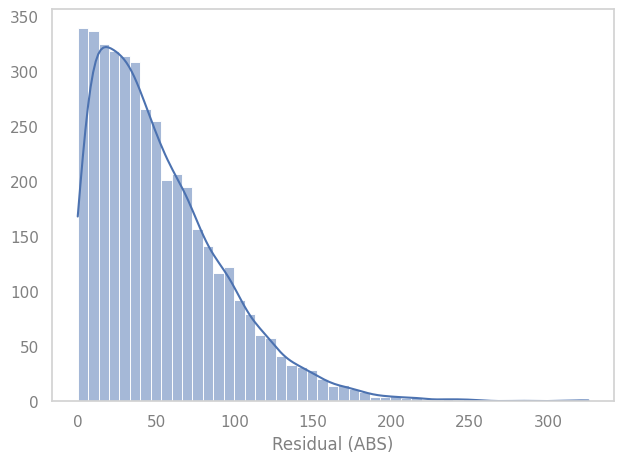

In [133]:
sns.histplot(df_residuals['abs_residual'], kde=True)
plt.ylabel('')
plt.xlabel('Residual (ABS)')
plt.grid(False)
plt.tight_layout();

Principais insights:  
- **Assimetria positiva forte:** a maioria dos erros absolutos está concentrada em valores baixos (pico entre 0 e 50 pontos), mas existe uma cauda longa que se estende até erros de 200–300 pontos;
- **"Long tail":** indica que, embora o MAE (~52 pontos) represente bem o erro típico, há um número não-desprezível de casos onde o erro é muito maior

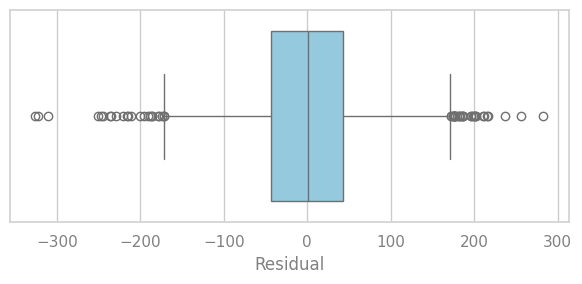

In [134]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=resid, color='skyblue')
plt.xlabel('Residual')
plt.tight_layout()

Principais insights:
- **Mediana (linha central da caixa):** Está muito próxima de zero, o que confirma que, no conjunto, o modelo não tem viés de over- ou under-prediction;
- **IQR (comprimento da caixa):** A caixa (intervalo entre o 1º quartil e o 3º quartil) se estende aproximadamente de -50 até +75 pontos. Isso significa que 50 % dos resíduos estão nesse intervalo de cerca de 125 pontos de amplitude;
- **Whiskers (bigodes):** Estendem-se até cerca de -200 e +200 pontos antes de marcarem os outliers;
- **Outliers:** Há diversos pontos além dos whiskers — resíduos abaixo de -200 e acima de +200. Esses casos representam erros extremos, típicos da "cauda longa" que vimos na distribuição dos resíduos absolutos;
- **Assimetria leve:** Note que o boxplot não é perfeitamente simétrico: a cauda positiva (erro previsto > real) parece ligeiramente mais longa. Isso sugere que o modelo ocasionalmente superestima notas com maior magnitude.

<br></br>
### Cross-Validation

In [135]:
from sklearn.model_selection import KFold, cross_val_score

In [136]:
rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

In [137]:
# Definir o número de folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [138]:
scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')

In [139]:
for i, j in enumerate(scores):
    print(f'Fold {i+1}: {j}')
    if i == 4:
        print(f'Média: {scores.mean()}')

Fold 1: 0.3056196003988556
Fold 2: 0.29896710032137364
Fold 3: 0.3055973710581401
Fold 4: 0.2942754297206275
Fold 5: 0.30610281635800407
Média: 0.3021124635714002


Em cada partição o modelo explica (R<sup>2</sup>) cerca de 30% da variabilidade. O valor médio de 0,3016 confirma o que vimos na métrica única de treino/teste (≈0,311), indicando bom ajuste sem grandes ganhos ilusórios.  


In [140]:
scores.std()

np.float64(0.004726095932838484)

A diferença máxima entre folds é apenas ~0,013 (de 0,2932 a 0,3066). Isso sugere que o modelo não está superajustando nenhum subconjunto específico dos dados, e que o desempenho generaliza bem. Um σ de 0,005 em R² é muito baixo, confirmando alta estabilidade. Dessa forma, podemos confiar que, ao aplicar o modelo em novas amostras da mesma população, ele terá performance muito próxima à que obteve em CV.